In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re
import urllib.request
import mecab
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 로드

In [28]:
df=pd.read_csv('./df_label_O.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17410 entries, 0 to 17409
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   labels  17410 non-null  float64
 1   title   17410 non-null  object 
dtypes: float64(1), object(1)
memory usage: 272.2+ KB


In [29]:
mecab = mecab.MeCab()

AttributeError: 'MeCab' object has no attribute 'MeCab'

In [30]:
df['tokenized'] = df['title'].apply(mecab.morphs)

In [37]:
df.head(2)

,labels,title,tokenized
0,1.0,새로운 생산공장으로 인해 회사는 예상되는 수요 증가를 충족시킬 수 있는 능력을 증가...,"[새로운, 생산, 공장, 으로, 인해, 회사, 는, 예상, 되, 는, 수요, 증가,..."
1,1.0,"2009-2012년 회사의 업데이트된 전략에 따르면, Basware는 20% - 4...","[2009, -, 2012, 년, 회사, 의, 업데이트, 된, 전략, 에, 따르, ..."


In [32]:
word_list = pd.read_csv('word_list.csv')
word_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16845 entries, 0 to 16844
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    16845 non-null  object
 1   cnt     16845 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 263.3+ KB


# 불용어 제거

In [33]:
word_list1 =[]
for word in word_list['word']:
    word_list1.append(word)
len(word_list1)

16845

In [12]:
stop_word = []
for token in df['tokenized']:
    for word in token:
        if word not in word_list1:
            stop_word.append(word)
        

In [13]:
len(stop_word)

171242

In [18]:
stop_word_result = []
for value in stop_word:
    if value not in stop_word_result:
        stop_word_result.append(value)

print(len(stop_word_result))

1416


In [20]:
stop_word_result = pd.DataFrame(stop_word_result)

In [21]:
stop_word_result.to_csv('./stop_word_result.csv')

In [23]:
stop_word_result.head()

,0
0,으로
1,는
2,되
3,를
4,수


In [24]:
stop_word = []
for word in stop_word_result[0]:
    stop_word.append(word)
len(stop_word)


1416

In [35]:
df_test = pd.DataFrame(columns=['tokenized'])
df_test

,tokenized


In [45]:
tmp_list =[]
for token in df['tokenized']:
    tmp =[]
    for word in token:
        if word not in stop_word:
            tmp.append(word)
    tmp_list.append(tmp)

In [46]:
len(tmp_list)

17410

In [47]:
df['tokenized_new'] = tmp_list

In [49]:
df[['tokenized','tokenized_new']].head()

,tokenized,tokenized_new
0,"[새로운, 생산, 공장, 으로, 인해, 회사, 는, 예상, 되, 는, 수요, 증가,...","[새로운, 생산, 공장, 인해, 회사, 예상, 수요, 증가, 충족, 시킬, 능력, ..."
1,"[2009, -, 2012, 년, 회사, 의, 업데이트, 된, 전략, 에, 따르, ...","[2009, 2012, 회사, 업데이트, 전략, 따르, Basware, 20, 40..."
2,"[ASPOCOMP, 의, 성장기, 에, 대한, 자금, 조달, 은, 기술, 적, 으로...","[ASPOCOMP, 성장기, 대한, 자금, 조달, 기술, 까다로운, HDI, 인쇄,..."
3,"[2010, 년, 4, 분기, Componenta, 의, 순, 매출, 은, 전년, ...","[2010, 분기, Componenta, 매출, 전년, 동기, 7600, 유로, 1..."
4,"[2010, 년, 3, 분기, 순, 매출, 은, 5, ., 2, %,, 영업, 이익...","[2010, 분기, 매출, 영업, 이익, 34, 증가, 23, MN, 기록]"


In [52]:
# df['tokenized'][0]

In [53]:
# df['tokenized_new'][0]

In [55]:
# df.to_csv('df_del_stopword.csv', index=False)

# Train-Validation

In [58]:
X=df['tokenized_new']
y=df['labels']

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [60]:
# X_train.to_csv('./X_train_del_stopword.csv', index=False)

# Tokenize

In [61]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_encoded = tokenizer.texts_to_sequences(X_train)
X_val_encoded = tokenizer.texts_to_sequences(X_val)
print(X_train_encoded[:5])
print(X_val_encoded[:5])

[[6, 967, 60, 33, 2346, 747, 266, 210, 3222, 1831, 110, 41, 111, 3686, 2, 4, 16, 788, 2, 61, 54], [2141, 336, 193, 301, 3, 202, 489], [501, 91, 1, 246, 5690, 198], [358, 307, 3687, 2573, 1226, 1986, 1109], [21, 314, 5691, 502, 50, 44, 5692, 8265, 480, 2347, 8266, 1507, 1014, 769]]
[[12, 10, 17, 11, 1277, 44, 37, 294], [10, 687, 1512, 213, 217, 12899, 913], [311, 558, 5, 3581, 156], [232, 8, 4, 16, 427, 1076, 28, 1070], [2917, 165, 377, 237, 309, 727, 1190, 62]]


In [62]:
word_to_index = tokenizer.word_index
vocab_size = len(word_to_index) + 1
print(vocab_size)

15180


## 패딩

In [63]:
X_train[:2]

10485    [핀란드, 부품, 공급, 업체, 컴포넌트, 코퍼레이션, OMX, 헬싱, CTH, 화...
3952                       [인지, 기능, 개선, 프로, 바이오, 동화약품, 인증]
Name: tokenized_new, dtype: object

본문의 최대 길이 : 40
본문의 평균 길이 : 9.497917863296955


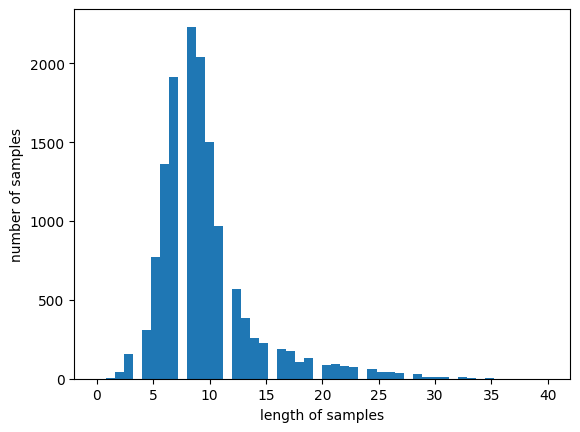

In [64]:
print(  '본문의 최대 길이 :',   max(   len(sent) for sent in X_train   )   )
# X_train 요소 하나하나 길이 재서 최대길이추출
print(   '본문의 평균 길이 :',  sum(    map(len, X_train)  )   /  len(X_train)     )
# X_train 요소 길이 재서 sum하구 X_train 개수로 나눈다
plt.hist([len(sent) for sent in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [65]:
max_len = 40

In [66]:
X_train_encoded = pad_sequences(X_train_encoded, maxlen=max_len)
X_val_encoded = pad_sequences(X_val_encoded, maxlen=max_len)

In [74]:
# X_train_encoded[:1]

In [67]:
X_train_encoded.shape

(13928, 40)

In [68]:
X_val_encoded.shape

(3482, 40)

In [69]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

# 모델
* 테스트 정확도: 0.3935
* 불용어 제거 후 남은 단어들의 사용횟수가 너무 적어서 그런듯

In [71]:
embedding_dim = 64
hidden_units = 64
num_classes = 3

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(num_classes, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('./NLP/best_model_del_stopword.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train_encoded, y_train, epochs=15, callbacks=[es, mc], batch_size=32, validation_split=0.2)

Epoch 1/15
348/349 [============================>.] - ETA: 0s - loss: 0.6793 - acc: 0.7092
Epoch 1: val_acc improved from -inf to 0.81838, saving model to ./NLP\best_model_del_stopword.h5
349/349 [==============================] - 10s 21ms/step - loss: 0.6792 - acc: 0.7092 - val_loss: 0.4561 - val_acc: 0.8184
Epoch 2/15
349/349 [==============================] - ETA: 0s - loss: 0.2816 - acc: 0.8953
Epoch 2: val_acc improved from 0.81838 to 0.83632, saving model to ./NLP\best_model_del_stopword.h5
349/349 [==============================] - 7s 21ms/step - loss: 0.2816 - acc: 0.8953 - val_loss: 0.4457 - val_acc: 0.8363
Epoch 3/15
347/349 [============================>.] - ETA: 0s - loss: 0.1479 - acc: 0.9479
Epoch 3: val_acc did not improve from 0.83632
349/349 [==============================] - 8s 22ms/step - loss: 0.1483 - acc: 0.9478 - val_loss: 0.5226 - val_acc: 0.8317
Epoch 4/15
349/349 [==============================] - ETA: 0s - loss: 0.0829 - acc: 0.9723
Epoch 4: val_acc did not i

In [72]:
loaded_model = load_model('./NLP/best_model_label_balanced.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_val_encoded, y_val)[1]))

109/109 [==============================] - 1s 5ms/step - loss: 1.7665 - acc: 0.3935

 테스트 정확도: 0.3935
